# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [21]:
import networkx as nx
import nxviz
import community
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('data/us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

data = df_to_graph(basketball, 'Name', 'Games')
data.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [5]:
G = nx.from_pandas_edgelist(data, source='Name_x', target='Name_y', edge_attr=True,)

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [6]:
print("Number of nodes: ", G.size())
print("Number of edges: ", G.order())
print("Average degree: ", G.degree())
print("Density of graph: ", nx.density(G))

Number of nodes:  1232
Number of edges:  196
Average degree:  [('Adrian Delano Dantley', 11), ('Ernest "Ernie" Grunfeld', 11), ('Kenneth Alan "Kenny" Carr', 11), ('Michel Taylor "Tate" Armstrong', 11), ('Mitchell William "Mitch" Kupchak', 11), ('Philip Jackson "Phil" Ford, Jr.', 11), ('Phillip Gregory "Phil" Hubbard', 11), ('Scott Glenn May', 11), ('Steven Bernard "Steve" Sheppard', 11), ('Thomas Joseph "Tom" LaGarde', 11), ('Walter Paul Davis', 11), ('William Quinn Buckner', 11), ('Adrian Howard Smith', 11), ('Burdette Eliele "Burdie" Haldorson', 22), ('Darrall Tucker Imhoff', 11), ('Earl Allen Kelley', 11), ('Jay Joseph Hoyland Arnette', 11), ('Jerome Alan "Jerry" West', 11), ('Jerry Ray Lucas', 11), ('Lester Everett "Les" Lane', 11), ('Oscar Palmer Robertson', 11), ('Robert Lewis "Bob" Boozer', 11), ('Terence Gilbert "Terry" Dischinger', 11), ('Walter Jones "Walt" Bellamy, Jr.', 11), ('Alexander John "Alex" Groza', 13), ('Clifford Eugene "Cliff" Barker', 13), ('Donald Argee "Don" Ba

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [7]:
bc = nx.betweenness_centrality(G)
sorted_bc = {k: bc[k] for k in sorted(bc, key=bc.get, reverse=True)}
list(sorted_bc.items())[0:5]

[('Gary Dwayne Payton', 0.09193761564895586),
 ('Jason Frederick Kidd', 0.09135606661379858),
 ('Carmelo Kyan Anthony', 0.04742268041237115),
 ('David Maurice Robinson', 0.03266190853819722),
 ('William Marion "Bill" Hougland', 0.030240549828178694)]

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [8]:
ec = nx.eigenvector_centrality_numpy(G)
sorted_ec = {k: ec[k] for k in sorted(ec, key=ec.get, reverse=True)}
list(sorted_ec.items())[0:5]

[('Carmelo Kyan Anthony', 0.34185005667190693),
 ('LeBron Raymone James', 0.2884535214315888),
 ('Christopher Emmanuel "Chris" Paul', 0.22431681558531258),
 ('Kobe Bean Bryant', 0.2243168155853125),
 ('Deron Michael Williams', 0.22431681558531244)]

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [9]:
dc = nx.degree_centrality(G)
sorted_dc = {k: dc[k] for k in sorted(dc, key=dc.get, reverse=True)}
list(sorted_dc.items())[0:5]

[('Carmelo Kyan Anthony', 0.18461538461538463),
 ('David Maurice Robinson', 0.14358974358974358),
 ('Robert Albert "Bob" Kurland', 0.13333333333333333),
 ('LeBron Raymone James', 0.13333333333333333),
 ('William Marion "Bill" Hougland', 0.12307692307692308)]

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


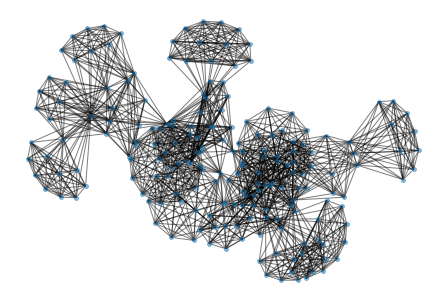

In [10]:
nx.draw_kamada_kawai(G, node_size=15, alpha=0.5)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

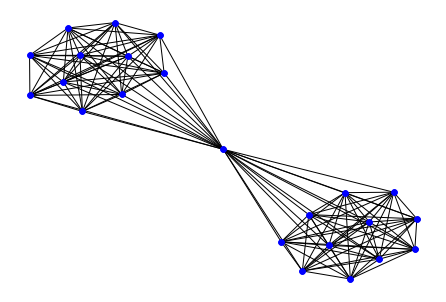

In [11]:
nx.ego_graph(G, 'Gary Dwayne Payton')
# Create ego graph of main hub
hub_ego=nx.ego_graph(G,'Gary Dwayne Payton')
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=30,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,node_size=30,node_color='b')

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

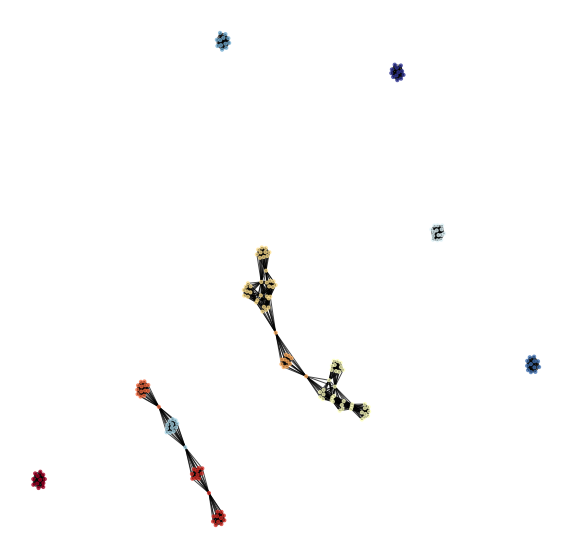

In [18]:
partition = community.best_partition(G)
plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw(G, node_size=10, alpha=0.7, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [66]:
data = df_to_graph(basketball, 'Games', 'Name')
data.head()

,Games_x,Games_y,Name
2,1948 Summer,1952 Summer,1
3,1952 Summer,1948 Summer,1
5,1952 Summer,1956 Summer,1
6,1956 Summer,1952 Summer,1
8,1956 Summer,1960 Summer,1


In [68]:
G = nx.from_pandas_edgelist(data, source='Games_x', target='Games_y', edge_attr=True,)

# Statistics of the graph
print("Number of nodes: ", G.size())
print("Number of edges: ", G.order())
print("Average degree: ", G.degree())
print("Density of graph: ", nx.density(G))

Number of nodes:  15
Number of edges:  13
Average degree:  [('1948 Summer', 1), ('1952 Summer', 2), ('1956 Summer', 2), ('1960 Summer', 1), ('1984 Summer', 1), ('1992 Summer', 3), ('1988 Summer', 2), ('1996 Summer', 3), ('2000 Summer', 2), ('2008 Summer', 4), ('2004 Summer', 3), ('2012 Summer', 3), ('2016 Summer', 3)]
Density of graph:  0.19230769230769232


In [69]:
# Between Centrality (Top 5 Nodes)
bc = nx.betweenness_centrality(G)
sorted_bc = {k: bc[k] for k in sorted(bc, key=bc.get, reverse=True)}
list(sorted_bc.items())[0:5]

[('2000 Summer', 0.24242424242424243),
 ('1996 Summer', 0.2272727272727273),
 ('2008 Summer', 0.2272727272727273),
 ('1992 Summer', 0.10606060606060606),
 ('1952 Summer', 0.030303030303030304)]

In [71]:
# Eigenvalue Centrality (Top 5 Nodes)
ec = nx.eigenvector_centrality_numpy(G)
sorted_ec = {k: ec[k] for k in sorted(ec, key=ec.get, reverse=True)}
list(sorted_ec.items())[0:5]

[('2008 Summer', 0.5222318425742726),
 ('2004 Summer', 0.47363331020313393),
 ('2012 Summer', 0.47363331020313376),
 ('2016 Summer', 0.47363331020313365),
 ('2000 Summer', 0.1993807241723648)]

In [70]:
# Degree Centrality (Top 5 Nodes)
dc = nx.degree_centrality(G)
sorted_dc = {k: dc[k] for k in sorted(dc, key=dc.get, reverse=True)}
list(sorted_dc.items())[0:5]

[('2008 Summer', 0.3333333333333333),
 ('1992 Summer', 0.25),
 ('1996 Summer', 0.25),
 ('2004 Summer', 0.25),
 ('2012 Summer', 0.25)]

### Generate a network visualization of this graph using the layout of your choice.

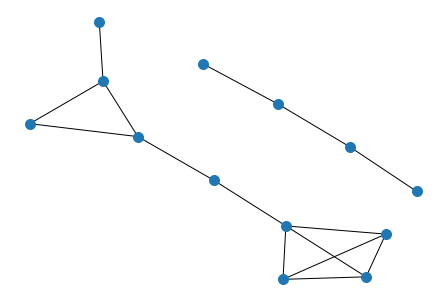

In [77]:
nx.draw_kamada_kawai(G, node_size=100, alpha=1)